In [12]:
import numpy as np
import pandas as pd
import string
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
import math

In [15]:
#OG list
AH_MP_ids = ['6X7I','1MP6','2MC7','1A11','1ALE','1ALF','1B9Q','1BM4','1BMX','1CFG','1DEP','1DJF','1EMZ','1FW5','1HO2','1HOD','1HOF','1JDM','1KDL','1LBJ','1LYP','1M25','1MOT','1O53','1ODP','1OEG','1P82','1PLP','1QG9','1R7D','1RKL','1SKH','1SPF','1T5Q','1V4Z','1VTP','1XC0','1XOO','1XOP','1Y32','1Z2T','1Z65','1ZRV','2AP7','2B0Y','2B19','2DCI','2DTB','2FXY','2FXZ','2G9L','2G9P','2GD3','2HN8','2JMY','2JOS','2JPK','2JTW','2JUI','2JXF','2K10','2K44','2K58','2K59','2K6O','2K8J','2K98','2KDR','2KEH','2KFE','2KGN','2KHF','2KI9','2KIT','2KJN','2KNS','2KV5','2KWZ','2KZQ','2L36','2L4G','2L5R','2L63','2L77','2LAT','2LBG','2LCM','2LIF','2LMF','2LQY','2LUG','2LUV','2LX0','2LZP','2LZQ','2M0H','2M0W','2M8M', '2MCE','2ME1','2MG1','2MG2','2MHW','2MJ2','2MLU','2MMM','2MKB','2MUA','2MUE','2MVH','2MVJ','2MWT','2N1C','2N1P','2N58','2N6M','2N92','2N9C','2NCS','2NCU','2NCW','2NCX','2NCY','2NR1','2OJM','2OJN','2OJO','2PCO','2PV6','2RLH','2RLW','2RMG','2RMH','2RMY','2RQ2','2RRH','3LEU','3MRA','4B19','5H2S','5I4G','5LBJ','5NDA','5UJQ','5UJR','5XDJ','5Y22','5Z1Y','6A5J','6A8Y','6AHZ','6B3U','6BJF','6CFA','6CSK','6CSZ','6CT1','6CT4','6DST','6FS5','6GIF','6GIG','6GNZ','6GO0','6GS9','6HN9','6HZ2','6IHA','6MBM','6RRL','6RRO','6TWG','6VLA','6YHF','7ASY','7AT7','7ATB','7B2F','7BX2','7CK5','7DEH','7L83','7NS1','7OVZ','7P4X','7ZBS','1HLL']
AH_SL_ids = ['1AMB','1BY0','1DSK','1DTC','1FVY','1MF6','1Q2F','1VD7','1VD8','1VD9','1VDA','1W1N','1WN4','1WN8','1WNK','1WNM','1WNN','1YYB','1ZWD','2BN6','2GP8','2I9M','2IV5','2IV6','2KJM','2KPB','2LMA','2LQ0','2LQ1','2LQ2','2M1A','2M3F','2MRW','2MU6','2MU7','2MU9','2MUJ','2OVN','2PPZ','5TX8','6R2X']
BHPIN_ids = ['1K43', '1B1V','1BQF','1E0L','1E0M','1E0N','1EGT','1FGD','1FGE','1G04','1HRL','1I6C',  '1LFC','1NIZ','1TMR','1U0P','1U6V','1V28','2DJ9','2DJC','2EQH','2ESZ','2EVQ','2JN5','2JNI','2JQW','2JSB','2L07','2M9E','2M9I','2MDL','2MMT','2MMW','2MW3','2MW9','2MWA','2MWB','2MWD','2MWE','2MWF','2N4R','2N4S','2N4T','2N4U','2N4V','2N4W','2N68','2OP7','2ORU','2RT4','5KKM','5M9U','5XO3','5Y0H','6AAB','6AFQ','6EE9','6FGM','7K1M']
DSRP_ids = ['2UVS','1ACW','1AGT','1AXH','1AZJ','1BGK','1BNB','1C49','1CMR','1D1H','1D5Q','1DEC','1DU9','1E4Q','1E4R','1E4S','1E4T','1EI0','1EMX','1ERC','1ERD','1ERP','1ERY','1EWS','1F3K','1FEO','1FJN','1FSB','1FU3','1FYG','1G26','1H20','1HD6','1HLY','1HP2','1HP3','1HP9','1HTX','1HVW','1I26','1IM1','1IXT','1J5J','1K0P','1KAL','1KGM','1KWE','1LA4','1LGL','1M2S','1M4E','1M4F','1MM0','1MMC','1MR0','1MTX','1N1U','1N5G','1N8M','1NB1','1NBJ','1OIG','1ORX','1P8B','1PJV','1PMC','1PNH','1PT4','1PVZ','1Q2K','1QFD','1QGM','1QKY','1RJI','1ROO','1RPC','1S6W','1S6X','1SCO','1SP7','1SRB','1TSK','1TV0','1TYK','1UT3','1V5A','1V6R','1WM7','1WM8','1WPD','1WQB','1WQC','1WQD','1WQE','1WT8','1X7K','1Y29','1YP8','1ZFU','1ZJQ','1ZUV','2A2V','2AAP','2B5B','2BBG','2CBH','2CK4','2DDL','2EEM','2EFZ','2F2I','2F2J','2FQA','2G6U','2GW9','2GX1','2H1Z','2HLG','2I1T','2IT7','2JTB','2K1I','2K2Y','2K4U','2K72','2K9O','2KEF','2KGU','2KHB','2KIR','2KM9','2KOZ','2KP0','2KTX','2KUS','2KYJ','2L1J','2L1Q','2L2R','2LDE','2LDF','2LDS','2LEW','2LEY','2LG4','2LG6','2LI3','2LL1','2LLD','2LS1','2LSQ','2LXZ','2LZO','2M2Q','2M3J','2M6A','2M7T','2M9L','2MAU','2MBD','2MFS','2MIX','2MLA','2MLD','2MM5','2MM6','2MPQ','2MQU','2MSF','2MIX','2ML7','2MT7','2MW7','2N2G','2N2S','2N5Q','2N6B','2N6N','2N6O','2N9T','2NAJ','2NB2','2ND3','2NX7','2PTA','2RR0','2RTY','2RTZ','2RU0','2V1V','2WH9','3BBG','4B2U','4B2V','5FZX','5I1X','5I2P','5JHI','5JI4','5L1C','5LM0','5T3M','5T4R','5UJH','5V0Y','5V11','5WE3','5WXE','5X34','5Y0I','5Y0J','6BUC','6CEI','6CFB','6CKD','6CKF','6D3T','6D8H','6D8Q','6D8R','6D8S','6D8T','6D8U','6D8Y','6D93','6D9O','6D9P','6DHR','6E1L','6EFE','6F61','6K50','6K51','6KRA','6LF5','6MJV','6MK4','6MK5','6MZT','6NK9','6NUG','6NW8','6OFA','6PPC','6QJB','6QKF','6SAA','6SAB','6VH8','6VNZ','6XYH','7ALD','7EDK','7ELY','7JIA','7JIY','7KPD','7L7A','7LQR','7LZL','7N0T','7N23','7OD2','7RC7','7SAG','7SKC','7TH8']
MIX_MP_ids = ['1CW6','1JRJ','1MEQ','1SOL','2L3I','2LE7','2LKE','2M1J','2NAT','2NB8','2NCV','5L82','5T7Q','6FS4']
MIX_SL_ids = ['1BBA','1BHI','1FME','1FSD','1L2Y','1LB7','1PSV','1RIJ','1RIK','1RIM','1S4T','1V1D','1WZ4','2BBL','2JOF','2K76','2KI0','2L5I','2LL2','2LWB','2MTW']

In [9]:
def count_models(ID):
    with open('../NMR_structs/' + ID +'.pdb') as file:
        model_number = 0
        for line in file:
            line = line.strip () #for better control of ends of lines
            if line == "ENDMDL":
                model_number += 1
        if model_number == 0:
            model_number += 1
    file.close()
    return model_number

In [118]:
def find_models(NMR_structs, list_of_RMSDs):
    x = np.array(list_of_RMSDs)
    loc = list(np.where(x == np.amin(x)))
    #print('AF model: ' + str(math.floor(loc.pop()/NMR_structs)))
    af_rank = math.floor(loc.pop()[0]/NMR_structs)
    loc = list(np.where(x == min(x)))
    #print('NMR model: ' + str(loc.pop()%NMR_structs))
    NMR_mod = str(loc.pop()%NMR_structs)
    return(af_rank, NMR_mod)

## read in all AF2 data

In [16]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/AH_MP_ss/'
AF_files = os.listdir(AF_path)
AF_AH_MP_rmsds = {}
for i in AH_MP_ids:
    AF_AH_MP_rmsds[i] = []
    
for j in AH_MP_ids:
    rmsds = []
    with open(AF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_AH_MP_rmsds[j.split('_')[0]] = rmsds
    
AF_AH_MP_avg_rmsds = {}
for i in AH_MP_ids:
    AF_AH_MP_avg_rmsds[i] = []
for i,vals in AF_AH_MP_rmsds.items():
    AF_AH_MP_avg_rmsds[i] = (np.amin(vals))

In [17]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/AH_SL_ss/'
AF_files = os.listdir(AF_path)
AF_AH_SL_rmsds = {}
for i in AH_SL_ids:
    AF_AH_SL_rmsds[i] = []
    
for j in AH_SL_ids:
    rmsds = []
    with open(AF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_AH_SL_rmsds[j.split('_')[0]] = rmsds
    
AF_AH_SL_avg_rmsds = {}
for i in AH_SL_ids:
    AF_AH_SL_avg_rmsds[i] = []
for i,vals in AF_AH_SL_rmsds.items():
    AF_AH_SL_avg_rmsds[i] = (np.amin(vals))

In [19]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/MIX_MP_ss/'
AF_files = os.listdir(AF_path)
AF_MIX_MP_rmsds = {}
for i in MIX_MP_ids:
    AF_MIX_MP_rmsds[i] = []
    
for j in AF_files:
    rmsds = []
    with open(AF_path+j, encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_MIX_MP_rmsds[j.split('_')[0]] = rmsds
    
AF_MIX_MP_avg_rmsds = {}
for i in MIX_MP_ids:
    AF_MIX_MP_avg_rmsds[i] = []
for i,vals in AF_MIX_MP_rmsds.items():
    AF_MIX_MP_avg_rmsds[i] = (np.amin(vals))

In [20]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/MIX_SL_ss/'
AF_files = os.listdir(AF_path)
AF_MIX_SL_rmsds = {}
for i in MIX_SL_ids:
    AF_MIX_SL_rmsds[i] = []
    
for j in MIX_SL_ids:
    rmsds = []
    with open(AF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_MIX_SL_rmsds[j.split('_')[0]] = rmsds
    
AF_MIX_SL_avg_rmsds = {}
for i in MIX_SL_ids:
    AF_MIX_SL_avg_rmsds[i] = []
for i,vals in AF_MIX_SL_rmsds.items():
    AF_MIX_SL_avg_rmsds[i] = (np.amin(vals))

In [18]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/BHPIN_ss/'
AF_files = os.listdir(AF_path)
AF_BHPIN_rmsds = {}
for i in BHPIN_ids:
    AF_BHPIN_rmsds[i] = []
    
for j in BHPIN_ids:
    rmsds = []
    with open(AF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_BHPIN_rmsds[j.split('_')[0]] = rmsds
    
AF_BHPIN_avg_rmsds = {}
for i in BHPIN_ids:
    AF_BHPIN_avg_rmsds[i] = []
for i,vals in AF_BHPIN_rmsds.items():
    AF_BHPIN_avg_rmsds[i] = (np.amin(vals))

In [21]:
AF_path = '../AlphaFold_Predictions/RMSD_Calculations/DSRP_ss/'
AF_files = os.listdir(AF_path)
AF_DSRP_rmsds = {}
for i in DSRP_ids:
    AF_DSRP_rmsds[i] = []
    
for j in DSRP_ids:
    rmsds = []
    with open(AF_path+j+'_RMSD.txt', encoding = "ISO-8859-1") as f:
        lines = f.readlines()
        for i in lines:
            rmsds.append(float(i.split(' ')[1]))
    AF_DSRP_rmsds[j.split('_')[0]] = rmsds
    
AF_DSRP_avg_rmsds = {}
for i in DSRP_ids:
    AF_DSRP_avg_rmsds[i] = []
for i,vals in AF_DSRP_rmsds.items():
    AF_DSRP_avg_rmsds[i] = (np.amin(vals))

In [39]:
AF =  AF_AH_MP_rmsds
AF.update(AF_AH_SL_rmsds)
AF.update(AF_MIX_MP_rmsds)
AF.update(AF_MIX_SL_rmsds)
AF.update(AF_BHPIN_rmsds)
AF.update(AF_DSRP_rmsds)

In [75]:
r0 = 0
r1 = 0
r2 = 0
r3 = 0
r4 = 0
for i,val in AF.items():
    x = find_models(count_models(i), val)
    if x == 0:
        r0 += 1
    if x == 1:
        r1 += 1
    if x == 2:
        r2 += 1
    if x == 3:
        r3 += 1
    if x == 4:
        r4 += 1

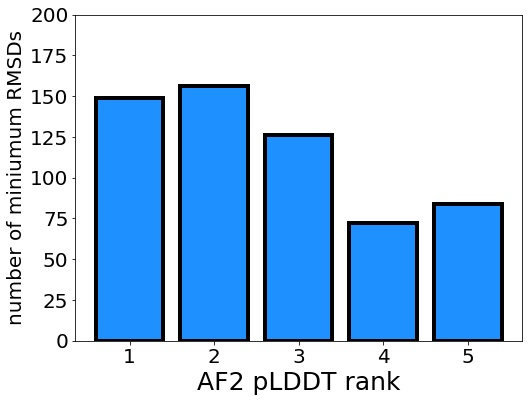

In [139]:
plt.figure(figsize=(8,6))
plt.bar(x=[1,2,3,4,5], height=[r0,r1,r2,r3,r4], color='dodgerblue', edgecolor='k', lw=4)

plt.xticks(size=20)
plt.xlabel('AF2 pLDDT rank', size =25)
plt.yticks(size=20)
plt.ylabel('number of miniumum RMSDs', size=20)
plt.ylim(0,200)
plt.savefig('pLDDT_rank.svg', format = 'svg')
plt.show()

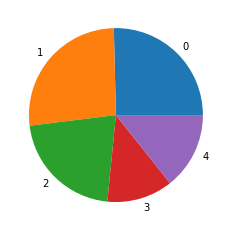

In [148]:
plt.pie([r0,r1,r2,r3,r4],labels=['0', '1', '2', '3', '4'])#)

plt.show()

In [119]:
alican_data = pd.DataFrame()
alican_data['PDB ID'] = AF.keys()

In [120]:
alican_data.set_index('PDB ID', inplace =True)

In [121]:
alican_data['AF2 rank'] = np.zeros(len(alican_data))
alican_data['NMR model'] = np.zeros(len(alican_data))

In [135]:
for i,val in AF.items():
    x = find_models(count_models(i), val)
    alican_data['AF2 rank'].loc[i] = str(x[0])
    alican_data['NMR model'].loc[i] = x[1].strip("[]")

In [137]:
alican_data.to_excel('Alican_AF2_NMR_mod.xlsx')

In [138]:
alican_data.to_csv('Alican_AF2_NMR_mod.csv')

In [141]:
alican_data.loc['1N5G']

AF2 rank         2
NMR model     0 20
Name: 1N5G, dtype: object